In [129]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [130]:
def visualize_training(task_name, epochs, accuracies, y_label):
    plt.plot()
    plt.plot(epochs, accuracies)
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.ylim([-0.2, 1.2])
    plt.title(f"Training details: {task_name}")
    plt.show()

def sigmoid(x):
    return (1/(1 + math.exp(-x)))

def sigmoidprime(x):
    return (sigmoid(x)*(1-sigmoid(x)))

def acc_threshhold(output_float):
    return int(output_float >= 0.5)

In [131]:
class Perceptron:
    def __init__(self, input_units):
        self.bias = np.random.randn()
        self.weights = np.random.normal(size=(input_units,1))
        self.alpha = 1 #alpha is the learning rate
        self.drive = 0
        
    def forward_step(self, inputs):
        self.drive = float(np.matmul(inputs, self.weights)) + self.bias
        #use sigmoid function as activation function
        return sigmoid(self.drive)
    
    
    def update(self, inputs, delta):
        gradients = np.zeros(self.weights.shape)
        #gradients = delta * inputs
        for i in range(len(gradients)):
            gradients[i] = delta * inputs[i]
        #modify gradients array with learning rate alpha using scalar multiplication
        gradients *= self.alpha
        #print("printing gradients after alpha multiplication")
        #print(gradients)
        self.weights -= gradients
        self.bias -= self.alpha * delta #gradients of bias is delta * 1 (unscaled)

In [132]:
class MLP:
    def __init__(self):
        #initialize output perceptron
        self.output_percep = Perceptron(4)
        #output variable for storing result
        self.output = 0
        #self.hidden_output_array = None
        
        #hidden layer with 4 perceptrons Convention: hidden(layer [indexing starts at 1])(number [indexing starts at 0])
        self.hidden10 = Perceptron(2)
        self.hidden11 = Perceptron(2)
        self.hidden12 = Perceptron(2)
        self.hidden13 = Perceptron(2)
        
        self.hidden1 = []
        self.hidden1.append(self.hidden10)
        self.hidden1.append(self.hidden11)
        self.hidden1.append(self.hidden12)
        self.hidden1.append(self.hidden13)
        
    def forward_step(self, inputs):
        hidden_layer_outputs = []
        for percep in self.hidden1:
            hidden_layer_outputs.append(percep.forward_step(inputs))
        hidden_output_array = np.array(hidden_layer_outputs)
        #reshape hidden_output_array
        self.output = self.output_percep.forward_step(hidden_output_array)
        
    def backprop_step(self, inputs, target):
        #calculate error value 'delta' for each perceptron
        delta_out = (target - self.output) * -1 * sigmoidprime(self.output_percep.drive)
        hidden_drive = []
        
        for percep in self.hidden1:
            hidden_drive.append(percep.drive)
        hidden_drive_array = np.array(hidden_drive)
        
        hidden_deltas = []
        for i in range(len(self.hidden1)):
            hidden_deltas.append((delta_out * self.output_percep.weights[i]) * sigmoidprime(hidden_drive_array[i]))
            
        
        #update step
        self.output_percep.update(hidden_drive_array, delta_out)
        
        for i in range(len(self.hidden1)):
            self.hidden1[i].update(inputs, hidden_deltas[i])
        
    def print_wb(self):
        i = 0
        for each in self.hidden1:
            print("Weights for perceptron ", i, ": ", each.weights)
            print("Bias for perceptron ", i, ": ", each.bias, "\n")
            i += 1
        print("Weights for output perceptron: ", self.output_percep.weights)
        print("Bias for output perceptron ", i, ": ", self.output_percep.bias, "\n")
        
        

In [133]:
#inputs for two-bit logic gates
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
print("Input shape: ", inputs.shape)

#targets for each logic gate
t_and = [0,0,0,1]
t_or = [0,1,1,1]
t_nand = [1,1,1,0]
t_nor = [1,0,0,0]
t_xor = [0,1,1,0]


Input shape:  (4, 2)


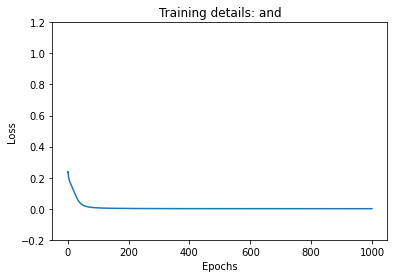

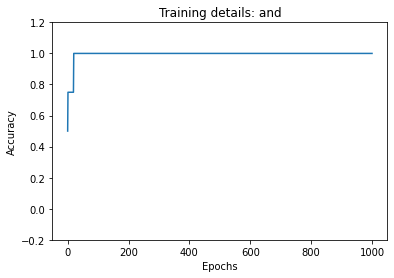

In [134]:
mlp = MLP()
epochs = 1000
epoch_axis = []
avg_loss_axis = []
accuracy_rate_axis = []
task_name = 'and'

for epoch in range(epochs+1):
    #within each epoch
    epoch_axis.append(epoch)
    epoch_losses = []
    correct_predictions = 0
    for i in range(len(inputs)):
        input_unit = inputs[i]
        #CHANGE TASK HERE
        target_result = t_and[i]
        
        
        mlp.forward_step(input_unit)
        if (epoch != 0):
            mlp.backprop_step(input_unit, target_result)
        epoch_losses.append(math.pow((target_result - mlp.output),2))
        if(acc_threshhold(mlp.output) == target_result):
            correct_predictions += 1
    mean_loss = np.mean(epoch_losses)
    avg_loss_axis.append(mean_loss)
    accuracy = float(correct_predictions / 4)
    accuracy_rate_axis.append(accuracy)
    
visualize_training(task_name, epoch_axis, avg_loss_axis, "Loss")
visualize_training(task_name, epoch_axis, accuracy_rate_axis, "Accuracy")



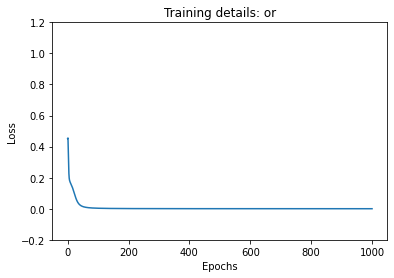

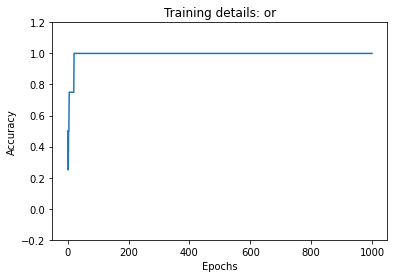

In [135]:
mlp = MLP()
epochs = 1000
epoch_axis = []
avg_loss_axis = []
accuracy_rate_axis = []
task_name = 'or'

for epoch in range(epochs+1):
    #within each epoch
    epoch_axis.append(epoch)
    epoch_losses = []
    correct_predictions = 0
    
    
    for i in range(len(inputs)):
        input_unit = inputs[i]
        #CHANGE TASK HERE
        target_result = t_or[i]
        
        
        mlp.forward_step(input_unit)
        if (epoch != 0):
            mlp.backprop_step(input_unit, target_result)
        epoch_losses.append(math.pow((target_result - mlp.output),2))
        if(acc_threshhold(mlp.output) == target_result):
            correct_predictions += 1
    mean_loss = np.mean(epoch_losses)
    avg_loss_axis.append(mean_loss)
    accuracy = float(correct_predictions / 4)
    accuracy_rate_axis.append(accuracy)
    
visualize_training(task_name, epoch_axis, avg_loss_axis, "Loss")
visualize_training(task_name, epoch_axis, accuracy_rate_axis, "Accuracy")



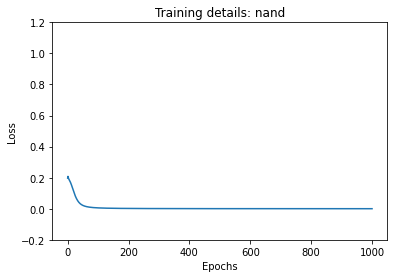

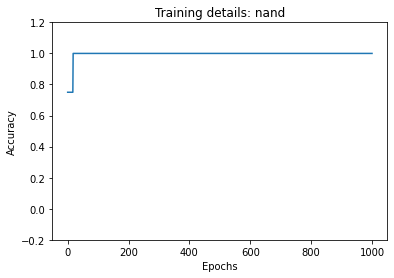

In [136]:
mlp = MLP()
epochs = 1000
epoch_axis = []
avg_loss_axis = []
accuracy_rate_axis = []
task_name = 'nand'

for epoch in range(epochs+1):
    #within each epoch
    epoch_axis.append(epoch)
    epoch_losses = []
    correct_predictions = 0
    
    
    for i in range(len(inputs)):
        input_unit = inputs[i]
        #CHANGE TASK HERE
        target_result = t_nand[i]
        
        
        mlp.forward_step(input_unit)
        if (epoch != 0):
            mlp.backprop_step(input_unit, target_result)
        epoch_losses.append(math.pow((target_result - mlp.output),2))
        if(acc_threshhold(mlp.output) == target_result):
            correct_predictions += 1
    mean_loss = np.mean(epoch_losses)
    avg_loss_axis.append(mean_loss)
    accuracy = float(correct_predictions / 4)
    accuracy_rate_axis.append(accuracy)
    
visualize_training(task_name, epoch_axis, avg_loss_axis, "Loss")
visualize_training(task_name, epoch_axis, accuracy_rate_axis, "Accuracy")



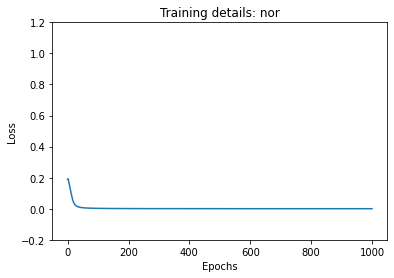

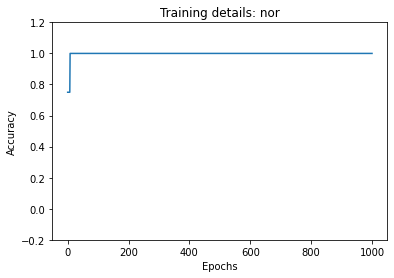

In [137]:
mlp = MLP()
epochs = 1000
epoch_axis = []
avg_loss_axis = []
accuracy_rate_axis = []
task_name = 'nor'

for epoch in range(epochs+1):
    #within each epoch
    epoch_axis.append(epoch)
    epoch_losses = []
    correct_predictions = 0
    

    for i in range(len(inputs)):
        input_unit = inputs[i]
        #CHANGE TASK HERE
        target_result = t_nor[i]
        
        
        mlp.forward_step(input_unit)
        if (epoch != 0):
            mlp.backprop_step(input_unit, target_result)
        epoch_losses.append(math.pow((target_result - mlp.output),2))
        if(acc_threshhold(mlp.output) == target_result):
            correct_predictions += 1
    mean_loss = np.mean(epoch_losses)
    avg_loss_axis.append(mean_loss)
    accuracy = float(correct_predictions / 4)
    accuracy_rate_axis.append(accuracy)
    
visualize_training(task_name, epoch_axis, avg_loss_axis, "Loss")
visualize_training(task_name, epoch_axis, accuracy_rate_axis, "Accuracy")



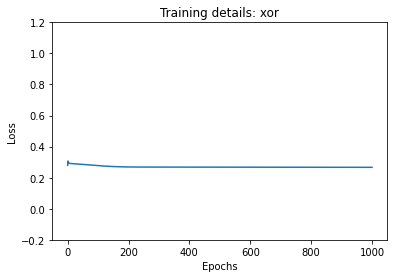

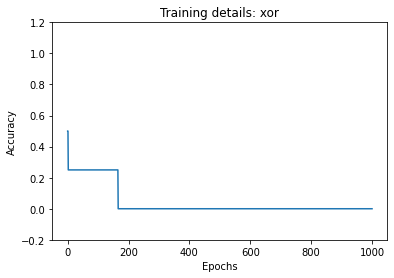

In [139]:
mlp = MLP()
epochs = 1000
epoch_axis = []
avg_loss_axis = []
accuracy_rate_axis = []
task_name = 'xor'

for epoch in range(epochs+1):
    #within each epoch
    epoch_axis.append(epoch)
    epoch_losses = []
    correct_predictions = 0
    
    #By randomizing the order of the input-target pairs, we are able to get more consistent results
    #with the XOR case
    #Condition: Works better with a lower alpha of 0.1
    new_order = np.arange(len(inputs))
    np.random.shuffle(new_order)
    new_inputs = []
    new_targets = []
    for each in new_order:
        new_inputs.append(inputs[each])
        new_targets.append(t_xor[each])
    
    for i in range(len(inputs)):
        input_unit = inputs[i]
        #CHANGE TASK HERE
        target_result = t_xor[i]
        
        
        mlp.forward_step(input_unit)
        if (epoch != 0):
            mlp.backprop_step(input_unit, target_result)
        epoch_losses.append(math.pow((target_result - mlp.output),2))
        if(acc_threshhold(mlp.output) == target_result):
            correct_predictions += 1
    mean_loss = np.mean(epoch_losses)
    avg_loss_axis.append(mean_loss)
    accuracy = float(correct_predictions / 4)
    accuracy_rate_axis.append(accuracy)
    
visualize_training(task_name, epoch_axis, avg_loss_axis, "Loss")
visualize_training(task_name, epoch_axis, accuracy_rate_axis, "Accuracy")

